<a href="https://colab.research.google.com/github/ananyamohapatra20/Unsupervised_Learning/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
# Import Important Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [149]:
# Load the iris dataset
iris_data = pd.read_csv('Iris Dataset.csv')

**Get basic info about the data and preprocess the data**


In [150]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [151]:
iris_data.info()#get the summary of a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [152]:
#To check the null values
iris_data.isnull().sum()


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [153]:
iris_data.nunique()
#to find unique values in each column 

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [154]:
# Separate the Species column for future comparison
species = iris_data['Species']
iris_data = iris_data.drop('Species', axis=1)



**Visualize the data**

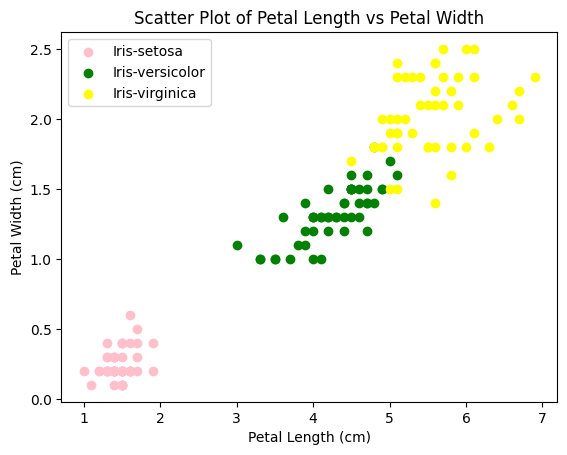

In [155]:
df1 = iris_data[species == 'Iris-setosa']
df2 = iris_data[species == 'Iris-versicolor']
df3 = iris_data[species == 'Iris-virginica']

plt.scatter(df1['PetalLengthCm'], df1['PetalWidthCm'], color='pink', label='Iris-setosa')
plt.scatter(df2['PetalLengthCm'], df2['PetalWidthCm'], color='green', label='Iris-versicolor')
plt.scatter(df3['PetalLengthCm'], df3['PetalWidthCm'], color='yellow', label='Iris-virginica')

plt.legend()
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Scatter Plot of Petal Length vs Petal Width')
plt.show()


In [165]:
#  Normalize the data
def normalize_data(data):
    return (data - data.mean(axis=0)) / data.std(axis=0)



In [157]:
#Compute the covariance matrix
def compute_covariance_matrix(data):
    covariance_matrix = np.cov(data, rowvar=False)
    return covariance_matrix


In [158]:

#Compute eigenvalues and eigenvectors
def compute_eigenvectors(covariance_matrix):
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    return eigenvalues, eigenvectors

#Sort eigenvalues and corresponding eigenvectors in descending order
def sort_eigenvalues(eigenvalues, eigenvectors):
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    return sorted_eigenvalues, sorted_eigenvectors

#Project the data onto the eigenvectors
def project_data(data, eigenvectors, k):
    projection_matrix = eigenvectors[:, :k]
    projected_data = np.dot(data, projection_matrix)
    return projected_data

# Reconstruct the data from the projected data
def reconstruct_data(projected_data, eigenvectors):
    reconstruction_matrix = eigenvectors[:, :projected_data.shape[1]]
    reconstructed_data = np.dot(projected_data, reconstruction_matrix.T)
    return reconstructed_data

#Calculate the explained variance ratio
def explained_variance_ratio(sorted_eigenvalues):
    total_variance = np.sum(sorted_eigenvalues)
    explained_variance = sorted_eigenvalues / total_variance
    return explained_variance


In [159]:

#Plot the data in the first three eigenvectors
def plot_data(data, species):
    # Map species labels to numeric values
    species_mapping = {
        'Iris-setosa': 0,
        'Iris-versicolor': 1,
        'Iris-virginica': 2
    }
    species_numeric = [species_mapping[s] for s in species]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=species_numeric)
    ax.set_xlabel('"First Eigenvector"')
    ax.set_ylabel("Second Eigenvector")
    ax.set_zlabel("Third Eigenvector")
    plt.title("Principal Component Analysis (PCA) on Iris Dataset")
    plt.show()




In [160]:

#Calculate accuracy
def calculate_accuracy(original_data, reconstructed_data):
    mse = np.mean((original_data - reconstructed_data) ** 2)
    accuracy = 1 - mse / np.var(original_data)
    return accuracy

Implementation Principal Component Analysis algorithms 

In [161]:

# Perform PCA
normalized_data = normalize_data(iris_data)
covariance_matrix = compute_covariance_matrix(normalized_data)
eigenvalues, eigenvectors = compute_eigenvectors(covariance_matrix)
sorted_eigenvalues, sorted_eigenvectors = sort_eigenvalues(eigenvalues, eigenvectors)
projected_data = project_data(normalized_data, sorted_eigenvectors, 3)
reconstructed_data = reconstruct_data(projected_data, sorted_eigenvectors)
explained_var = explained_variance_ratio(sorted_eigenvalues)



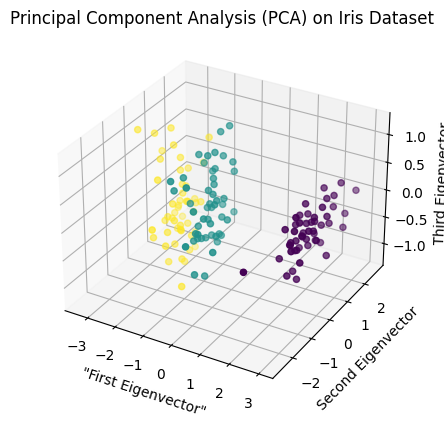

In [162]:

# Plotting the data in the first three eigenvectors
plot_data(projected_data, species)


In [163]:
# accuracy  Calculation
accuracy = calculate_accuracy(normalized_data, reconstructed_data)
print("Accuracy:", accuracy)


Accuracy: Id               0.972349
SepalLengthCm    0.983768
SepalWidthCm     0.998887
PetalLengthCm    0.979538
PetalWidthCm     0.956619
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


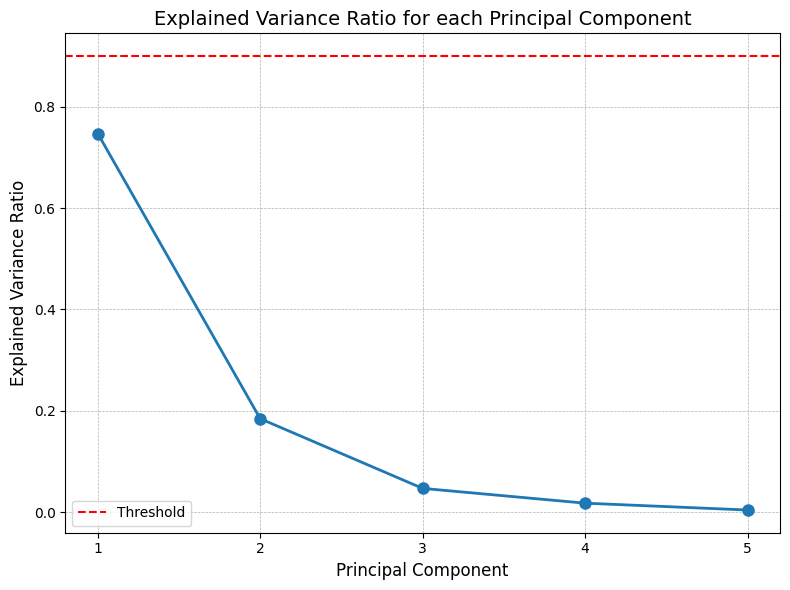

In [164]:
def visualize_accuracy(explained_var, threshold=0.9):
    components = range(1, len(explained_var) + 1)

    plt.figure(figsize=(8, 6))
    plt.plot(components, explained_var, marker='o', markersize=8, linewidth=2)
    plt.xlabel('Principal Component', fontsize=12)
    plt.ylabel('Explained Variance Ratio', fontsize=12)
    plt.title('Explained Variance Ratio for each Principal Component', fontsize=14)
    plt.xticks(components, fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True, linestyle='--', linewidth=0.5)
    
    # Adds horizontal line for the threshold
    plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
    plt.legend(fontsize=10)

    plt.tight_layout()
    plt.show()


visualize_accuracy(explained_var)